<a href="https://colab.research.google.com/github/cris-her/AI/blob/master/logistic_regression_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import torch.nn as nn #relacion lineal 
import torch.optim as optim

import matplotlib.pyplot as plt

# **Regresión Logística**
Preparamos nuestros datos

In [2]:
n= 100
h = n//2 # denota la mitad del dataset (50 pares)
dimension = 2

#generamos un dataset aleatorio 
# Por 3 para despues centrarlo en 3,3 y -3,3 
data= np.random.randn(n, dimension) * 3 

#muestro primeros105 valores de la data como ejemplo
data[:10]

array([[ 2.55159277,  2.80366748],
       [-0.02927494, -4.54435072],
       [-3.80614747, -6.00070744],
       [ 1.06305508,  0.64627275],
       [-2.3676616 ,  3.36251076],
       [-4.94921187,  0.50305387],
       [-3.37133177, -0.66316657],
       [ 0.13999846,  3.11733288],
       [-5.46653174,  2.11197991],
       [ 3.01959047, -5.57532682]])

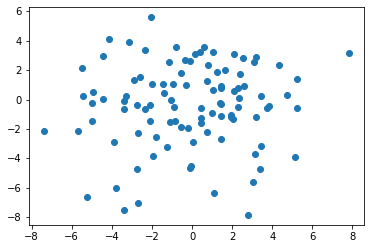

In [3]:
# Graficamos los 100 pares de puntos
plt.scatter(data[:,0], data[:,1])

In [4]:
# Muevo la primer mitad de datos (pares de 1 al 50) centrandolos en -3
data[:h, :] = data[:h, :] - 3 * np.ones((h, dimension))

In [5]:
# Muevo la segunda mitad (pares del 51 al 100) centrandolos en +3
data[h:, :] = data[h:, :] + 3*np.ones((h, dimension))

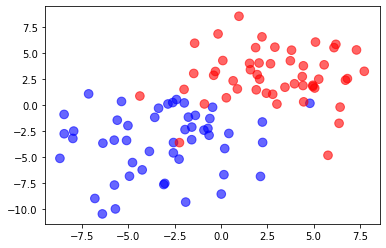

In [6]:
# Graficamos de nuevo
colors = ['blue', 'red']

color = np.array([colors[0]] * h + [colors[1]] * h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

In [7]:
target = np.array([0] * h + [1] * h).reshape(n,1)

# Definimos el tensor de entrada (la data)
x = torch.from_numpy(data).float().requires_grad_(True)

# definimos el tensor de salida (0 o 1)
y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

Definimos el modelo

tensor(0.1752, grad_fn=<BinaryCrossEntropyBackward>)


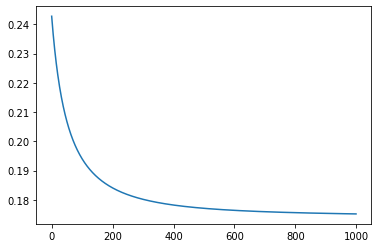

In [8]:
model = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()
            )

loss_function = nn.BCELoss() 
#Binary Cross Entropy/log loss

optimizer = optim.SGD(model.parameters(), lr=0.01) 
#Stochastic Gradient Descent

losses = []

iterations = 1000


# definimos el loop de aprendizaje
for i in range(iterations):
  #forwardpass
  result = model(x)
  loss = loss_function(result, y)
  losses.append(loss.data)

  #backward
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# Graficamos 
print(loss)
plt.plot(range(iterations), losses)

In [9]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5 
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] >0.5 
print(colors[prediction])

blue
red


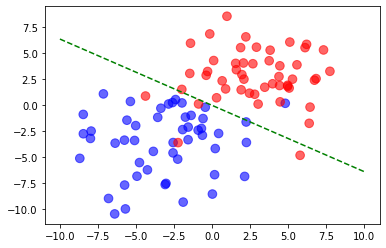

In [10]:
# Graficamos
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

# Hasta aqui es la grafica anterior
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

# graficamos una linea recta
x_axis = np.linspace(-10,10, n) 
y_axis = -(w1[0] + x_axis*w0[0][0] / w0[0][1])
plt.plot(x_axis, y_axis, 'g--')

Extras sobre la gráfica

In [11]:
# Valores de X
np.linspace(-10,10, n)

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [12]:
# Valores de Y
-(w1[0] + x_axis*w0[0][0] / w0[0][1])

array([ 6.38453971,  6.25523907,  6.12593843,  5.99663778,  5.86733714,
        5.73803649,  5.60873585,  5.4794352 ,  5.35013456,  5.22083392,
        5.09153327,  4.96223263,  4.83293198,  4.70363134,  4.57433069,
        4.44503005,  4.3157294 ,  4.18642876,  4.05712812,  3.92782747,
        3.79852683,  3.66922618,  3.53992554,  3.41062489,  3.28132425,
        3.15202361,  3.02272296,  2.89342232,  2.76412167,  2.63482103,
        2.50552038,  2.37621974,  2.2469191 ,  2.11761845,  1.98831781,
        1.85901716,  1.72971652,  1.60041587,  1.47111523,  1.34181458,
        1.21251394,  1.0832133 ,  0.95391265,  0.82461201,  0.69531136,
        0.56601072,  0.43671007,  0.30740943,  0.17810879,  0.04880814,
       -0.0804925 , -0.20979315, -0.33909379, -0.46839444, -0.59769508,
       -0.72699572, -0.85629637, -0.98559701, -1.11489766, -1.2441983 ,
       -1.37349895, -1.50279959, -1.63210023, -1.76140088, -1.89070152,
       -2.02000217, -2.14930281, -2.27860346, -2.4079041 , -2.53